In [24]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from prophet.serialize import model_to_json, model_from_json
import os
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r'D:\NASSCOM data\HACK-NASSCOM\complete_merged.csv',index_col=0)
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Adilabad,2018-01-01,0.0,11.200000,30.436842,25.721053,75.484211,0.236842,9.121053
1,Adilabad,2018-01-02,0.0,12.426316,33.621053,13.842105,57.284211,0.000000,9.094737
2,Adilabad,2018-01-03,0.0,20.131579,37.047368,15.736842,45.573684,0.000000,10.636842
3,Adilabad,2018-01-04,0.0,26.147368,40.431579,9.000000,72.452632,0.078947,15.726316
4,Adilabad,2018-01-05,0.0,29.168421,43.084211,11.384211,39.200000,0.252632,17.742105


In [12]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])

## Testing for a single district

In [29]:
df_district = df.loc[df['district']=='Adilabad'].copy()
df_new = df_district.drop(columns=['district'])
train, test = train_test_split(df_new, test_size=0.2, shuffle=False)
test = test.reset_index(drop=True)

df_train = train.rename(columns={'temp_max': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

model = Prophet() #instantiate Prophet
model.fit(df_train)

15:13:41 - cmdstanpy - INFO - Chain [1] start processing
15:13:41 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

# future_data = model.make_future_dataframe(periods=113, freq = 'D')
future_data = model.make_future_dataframe(periods=test.shape[0], freq = 'D')
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']     


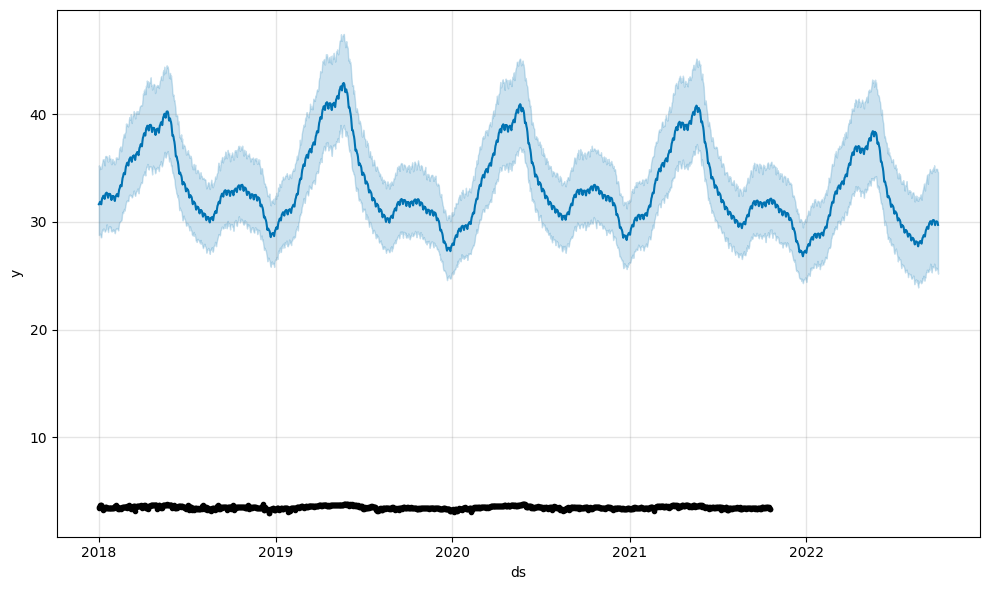

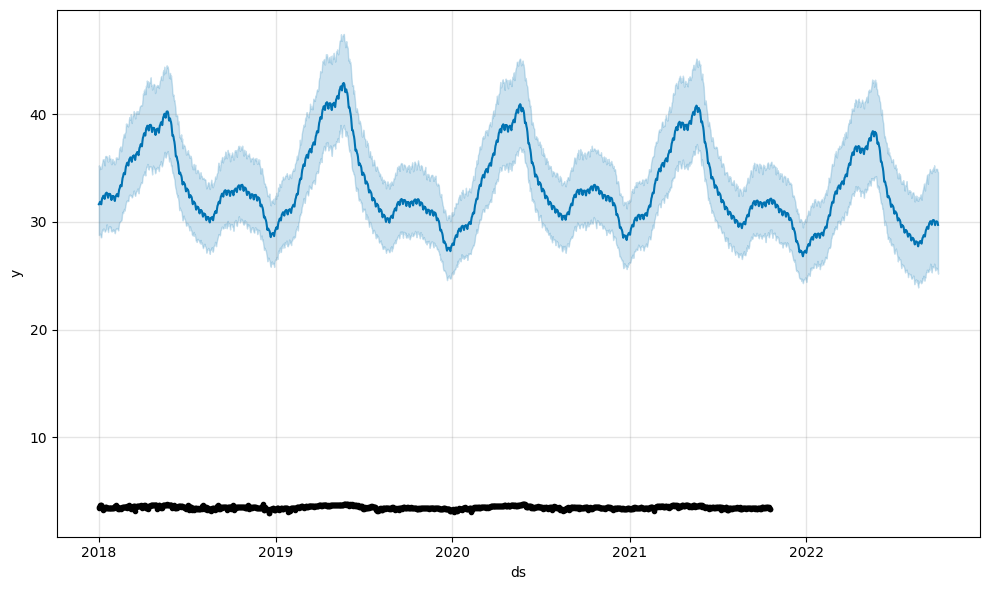

In [32]:
model.plot(forecast_data)

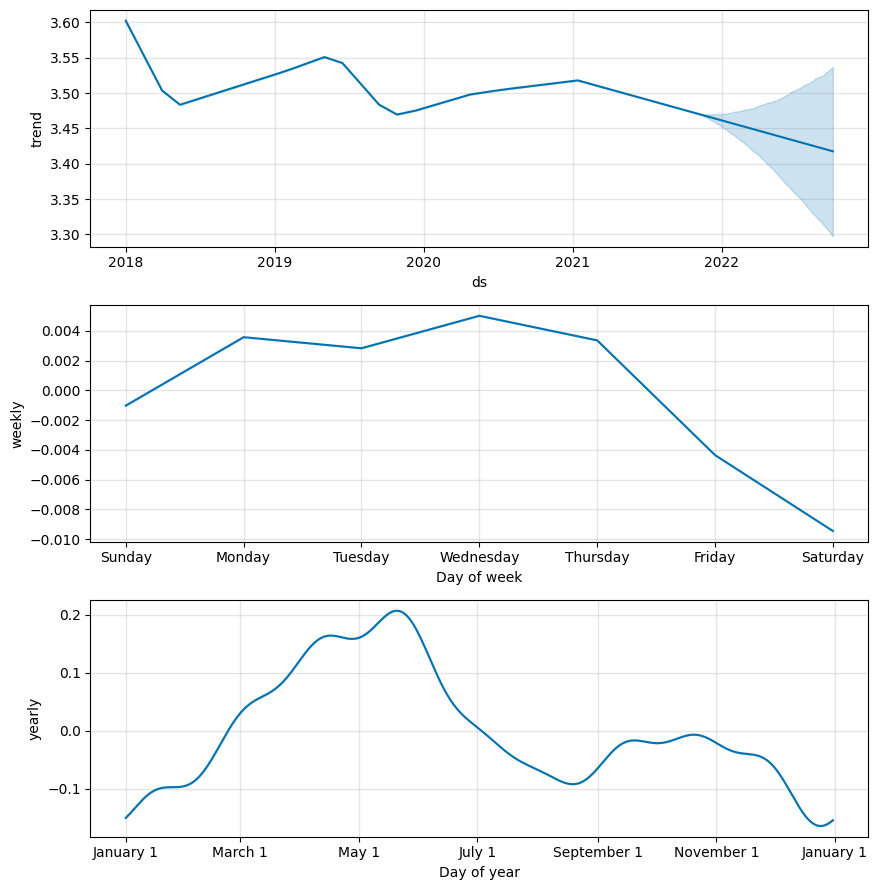

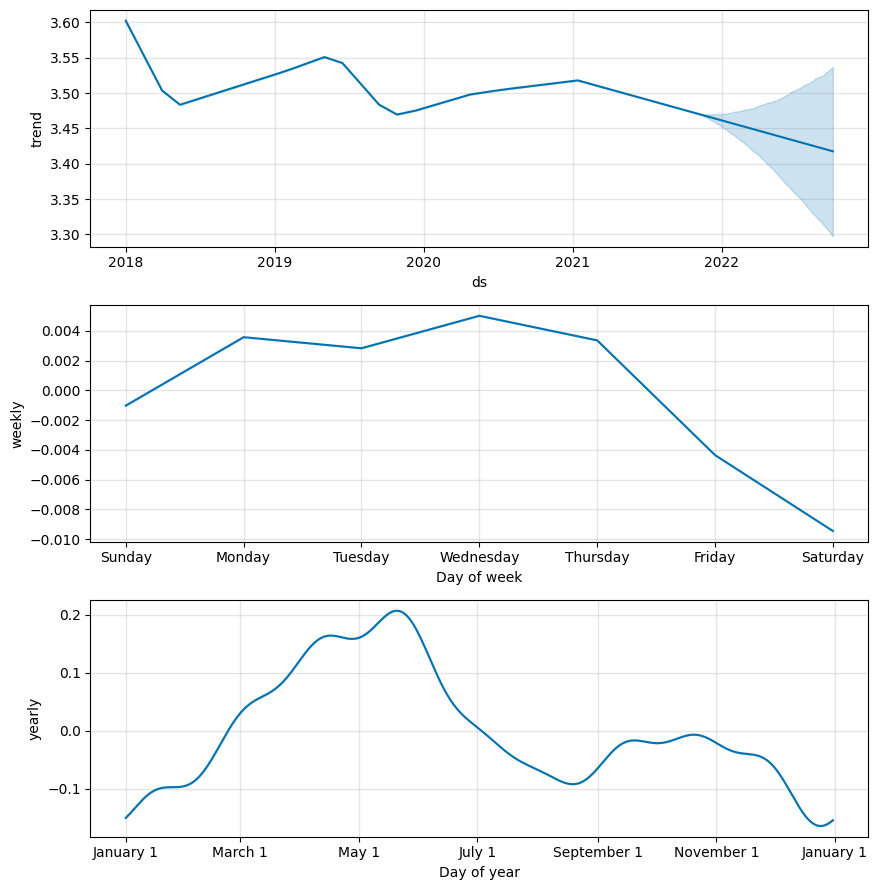

In [33]:
model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

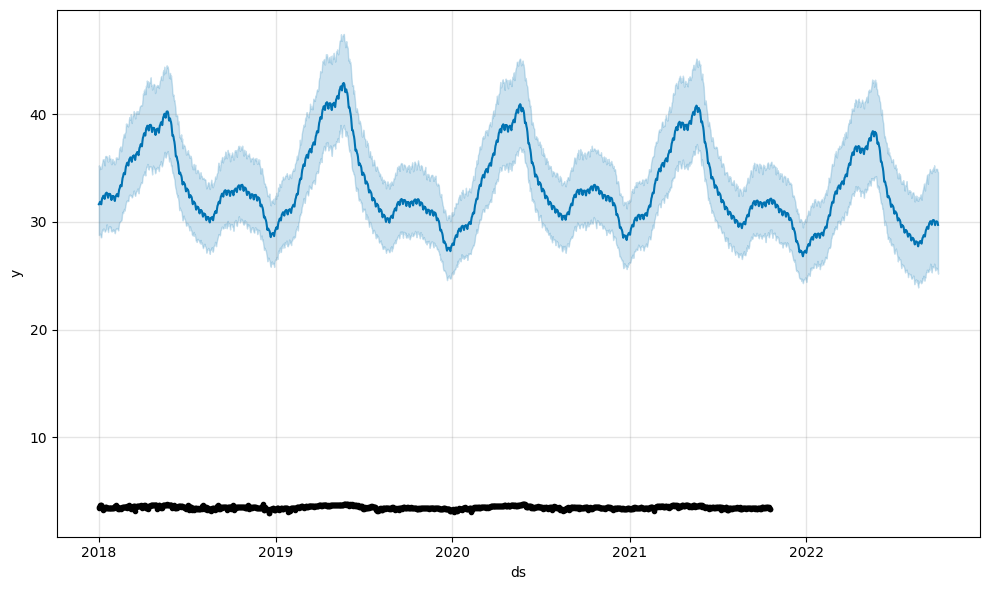

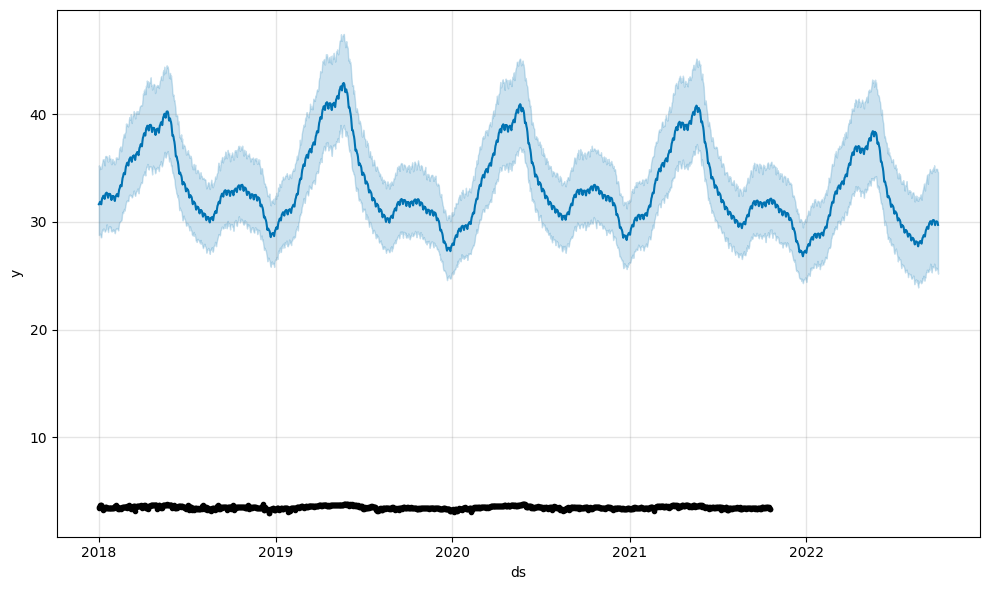

In [34]:
model.plot(forecast_data_orig)

In [13]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']     


In [14]:
df_train

,ds,rain,temp_min,y,humidity_min,humidity_max,wind_speed_min,wind_speed_max,y_orig,y_log
0,2018-01-01,0.000000,11.200000,30.436842,25.721053,75.484211,0.236842,9.121053,30.436842,3.415654
1,2018-01-02,0.000000,12.426316,33.621053,13.842105,57.284211,0.000000,9.094737,33.621053,3.515152
2,2018-01-03,0.000000,20.131579,37.047368,15.736842,45.573684,0.000000,10.636842,37.047368,3.612197
3,2018-01-04,0.000000,26.147368,40.431579,9.000000,72.452632,0.078947,15.726316,40.431579,3.699611
4,2018-01-05,0.000000,29.168421,43.084211,11.384211,39.200000,0.252632,17.742105,43.084211,3.763157
...,...,...,...,...,...,...,...,...,...,...
35389,2021-10-14,0.000000,21.283333,33.338889,46.105556,91.394444,0.000000,3.016667,33.338889,3.506725
35390,2021-10-15,0.000000,19.277778,33.166667,38.550000,91.705556,0.000000,4.511111,33.166667,3.501545
35391,2021-10-16,18.916667,22.544444,32.255556,48.550000,94.172222,0.000000,4.833333,32.255556,3.473690
35392,2021-10-17,18.916667,23.266667,28.916667,78.622222,96.650000,0.050000,4.311111,28.916667,3.364418


In [15]:
import plotly.graph_objs as go
import plotly.offline as py

import matplotlib.pyplot as plt
# import plotly.io as pio
# pio.renderers.default = "colab"

final_df = pd.DataFrame(forecast_data_orig)

#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [16]:
# Predict on training set with model
df_test = test.rename(columns={'date':'ds'})
df_test_results = model.predict(df_test)

In [17]:
df_test_results.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-19,3.473071,3.377675,3.573088,3.473071,3.473071,-0.004257,-0.004257,-0.004257,0.002837,0.002837,0.002837,-0.007094,-0.007094,-0.007094,0.0,0.0,0.0,3.468814
1,2021-10-20,3.472911,3.375156,3.573195,3.472911,3.472911,-0.001858,-0.001858,-0.001858,0.005020,0.005020,0.005020,-0.006878,-0.006878,-0.006878,0.0,0.0,0.0,3.471053
2,2021-10-21,3.472750,3.370815,3.569982,3.472750,3.472750,-0.003529,-0.003529,-0.003529,0.003368,0.003368,0.003368,-0.006898,-0.006898,-0.006898,0.0,0.0,0.0,3.469221
3,2021-10-22,3.472590,3.356942,3.568521,3.472590,3.472590,-0.011505,-0.011505,-0.011505,-0.004344,-0.004344,-0.004344,-0.007161,-0.007161,-0.007161,0.0,0.0,0.0,3.461085
4,2021-10-23,3.472430,3.353740,3.556205,3.472430,3.472430,-0.017116,-0.017116,-0.017116,-0.009444,-0.009444,-0.009444,-0.007672,-0.007672,-0.007672,0.0,0.0,0.0,3.455314


In [18]:
df_test_results['yhat'] = np.exp(df_test_results['yhat'])
df_test_results['yhat_lower'] = np.exp(df_test_results['yhat_lower'])
df_test_results['yhat_upper'] = np.exp(df_test_results['yhat_upper'])

In [19]:
df_test_results.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-19,3.473071,29.302555,35.626445,3.473071,3.473071,-0.004257,-0.004257,-0.004257,0.002837,0.002837,0.002837,-0.007094,-0.007094,-0.007094,0.0,0.0,0.0,32.098650
1,2021-10-20,3.472911,29.228857,35.630244,3.472911,3.472911,-0.001858,-0.001858,-0.001858,0.005020,0.005020,0.005020,-0.006878,-0.006878,-0.006878,0.0,0.0,0.0,32.170607
2,2021-10-21,3.472750,29.102227,35.515945,3.472750,3.472750,-0.003529,-0.003529,-0.003529,0.003368,0.003368,0.003368,-0.006898,-0.006898,-0.006898,0.0,0.0,0.0,32.111722
3,2021-10-22,3.472590,28.701293,35.464089,3.472590,3.472590,-0.011505,-0.011505,-0.011505,-0.004344,-0.004344,-0.004344,-0.007161,-0.007161,-0.007161,0.0,0.0,0.0,31.851512
4,2021-10-23,3.472430,28.609542,35.029991,3.472430,3.472430,-0.017116,-0.017116,-0.017116,-0.009444,-0.009444,-0.009444,-0.007672,-0.007672,-0.007672,0.0,0.0,0.0,31.668224


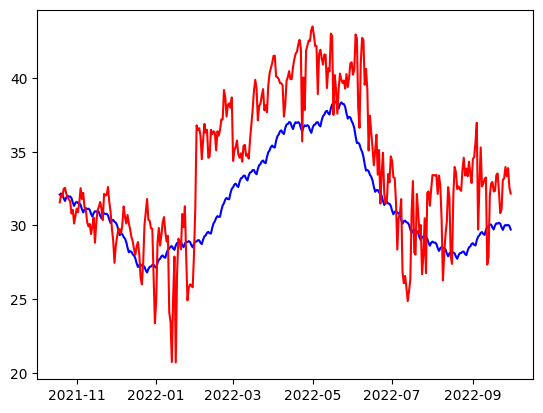

In [20]:
import matplotlib.pyplot as plt
plt.plot(df_test_results['ds'],df_test_results['yhat'], color = 'blue')   
plt.plot(test['date'],test['temp_max'], color='red')
plt.show()

In [21]:
r2_score(test['temp_max'], df_test_results['yhat'])

0.4150197803087833

In [22]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(model))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model


c:\ProgramData\Anaconda3\envs\ml-env\lib\site-packages\prophet\serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')



## Models for the target districts

In [13]:
current_dir = os.getcwd()
prophet_predictions_dir = os.path.join(current_dir,'predictions')

if not os.path.exists(prophet_predictions_dir):
    os.mkdir(prophet_predictions_dir)
    

In [77]:
def district_model(district_list,df,prediction_year):
    """ Calculates the district wise model score and returns the predictions
    for the year 2023"""
    future_test = pd.date_range(start="{}-01-01".format(prediction_year),end="{}-12-31".format(prediction_year)).strftime("%Y-%m-%d")
    future_test = [str (i) for i in future_test]
    future_test = pd.DataFrame({'ds':future_test})
    for district in district_list:        
        df_district = df.loc[df['district']==district].copy()
        df_new = df_district.drop(columns=['district'])
        train, test = train_test_split(df_new, test_size=0.2, shuffle=False)
        test = test.reset_index(drop=True)
        
        df_train = train.rename(columns={'temp_max': 'y', 'date':'ds'})
        
        model = Prophet() #instantiate Prophet
        model.fit(df_train)
        
        df_test = test.rename(columns={'date':'ds'})
        prediction = model.predict(df_test)        
        plt.plot(prediction['ds'],prediction['yhat'], color = 'blue',label = 'prediction')   
        plt.plot(test['date'],test['temp_max'], color='red',label = 'test set')
        plt.title('Graph for test data for district ' + str(district))
        plt.legend(loc='upper left')
        plt.show()
        
        print('r2 score is ',r2_score(test['temp_max'], prediction['yhat']),' for district ',district)
        print('mse is ',mean_squared_error(test['temp_max'], prediction['yhat']),' for district ',district)
        
        future_prediction =  model.predict(future_test)
        future_prediction = future_prediction.rename(columns= {'ds':'date','yhat':'temp_max'})
        future_prediction = future_prediction[['date','temp_max']]        
        
        district_dir = os.path.join(prophet_predictions_dir,district)
        future_prediction = future_prediction[['date','temp_max']] 
        
        if not os.path.exists(district_dir):
            os.mkdir(district_dir)
        
        
        model_name = str('{}_serialized_model.json'.format(district))
        model_path = os.path.join(district_dir,model_name)
        with open(model_path, 'w') as fout:
            fout.write(model_to_json(model))  # Save model

        # with open('serialized_model.json', 'r') as fin:
        #     m = model_from_json(fin.read())  # Load model
        
        # plt.plot(future_prediction['date'],future_prediction['temp_max'], color = 'blue')  
        # plt.title('2023 predictions for district ' + str(district))
        # plt.show()
        
        window_size = 3        
        pad_width = (window_size-1)//2  # floor division to ensure even padding
        temp_max_padded = np.pad(future_prediction['temp_max'], pad_width=pad_width, mode='constant', constant_values=np.nan)

        rolling_mean = np.convolve(temp_max_padded, np.ones(window_size)/window_size, mode='valid')

        # Define heatwave threshold
        threshold = 36

        labels = np.array([0 if temp < threshold else 1 for temp in rolling_mean])
        labels[0] = 0
        labels[len(labels)-1] = 0
        
        future_prediction['heatwave'] = labels
        
        output_path = os.path.join(district_dir,district+'_pred.csv')
        future_prediction.to_csv(output_path,index= False)
        
        fig, ax1 = plt.subplots()

        # Temperature data plot
        ax1.plot(future_prediction['temp_max'], color='blue')
        ax1.set_xlabel('Day')
        ax1.set_ylabel('Maximum Temperature (°C)', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Heatwave labels plot
        ax2 = ax1.twinx()  # create secondary y-axis
        ax2.scatter(np.arange(len(labels)), labels, color='red', marker='s')
        ax2.set_ylabel('Heatwave', color='red')
        ax2.set_ylim([-0.1, 1.1])  # set y-axis limits to ensure proper scaling
        ax2.tick_params(axis='y', labelcolor='red')

        # Add legend and title
        plt.legend(['Temperature', 'Heatwave'], loc='upper left')
        plt.title('Maximum Daily Temperature and Heatwaves for district {}'.format(district))
        plt.show()
                        

12:07:32 - cmdstanpy - INFO - Chain [1] start processing
12:07:33 - cmdstanpy - INFO - Chain [1] done processing


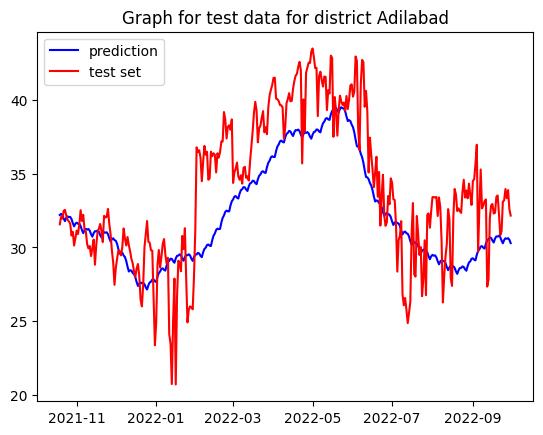

r2 score is  0.543994999948719  for district  Adilabad
mse is  10.687828040067537  for district  Adilabad


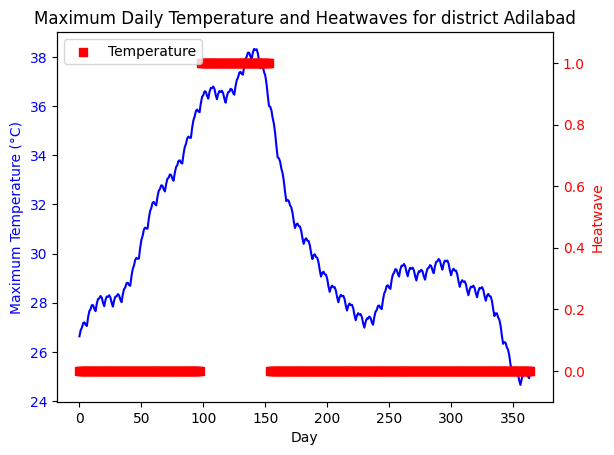

12:07:34 - cmdstanpy - INFO - Chain [1] start processing
12:07:34 - cmdstanpy - INFO - Chain [1] done processing


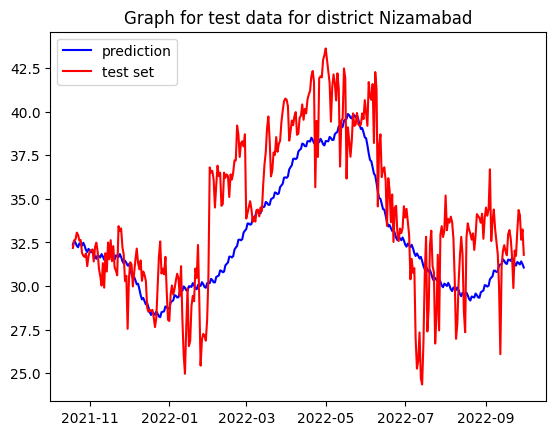

r2 score is  0.5676936271072281  for district  Nizamabad
mse is  8.068573151933595  for district  Nizamabad


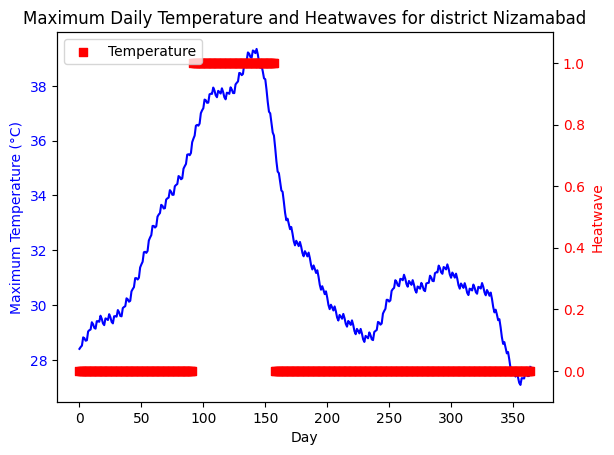

12:07:35 - cmdstanpy - INFO - Chain [1] start processing
12:07:35 - cmdstanpy - INFO - Chain [1] done processing


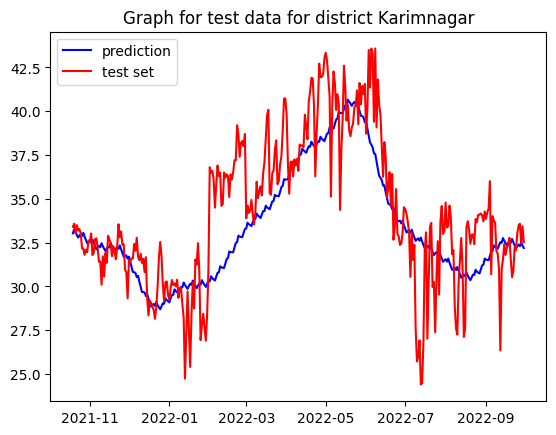

r2 score is  0.598991614637991  for district  Karimnagar
mse is  6.98040737536614  for district  Karimnagar


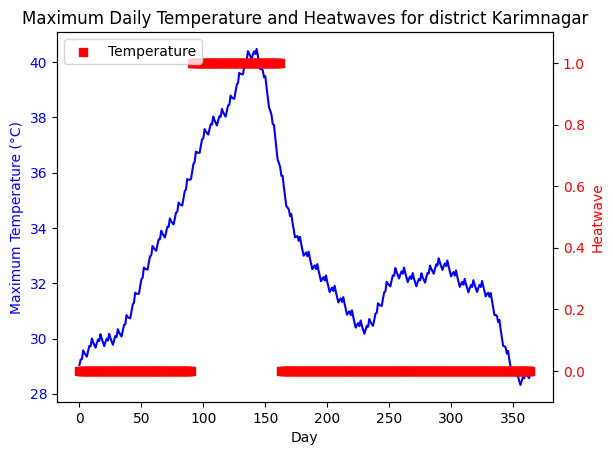

12:07:36 - cmdstanpy - INFO - Chain [1] start processing
12:07:36 - cmdstanpy - INFO - Chain [1] done processing


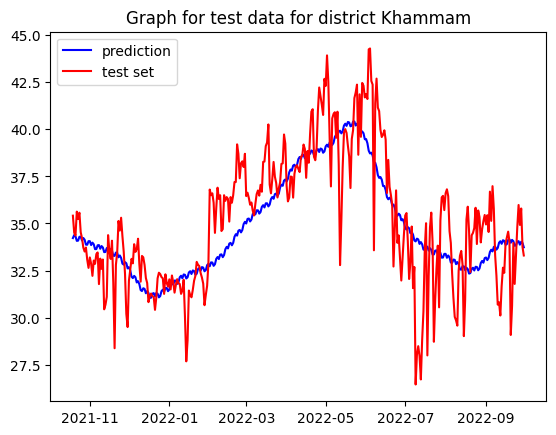

r2 score is  0.6011721492407502  for district  Khammam
mse is  4.981870004858808  for district  Khammam


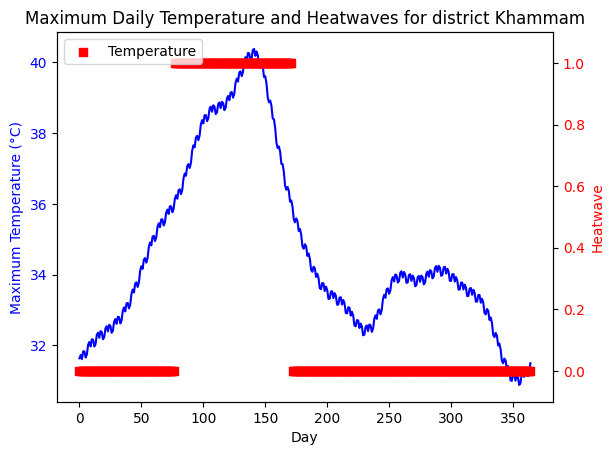

In [78]:
# district_list = [ 'Adilabad', 'Nizamabad', 'Warangal', 'Karimnagar','Khammam' ]
district_list = [ 'Adilabad', 'Nizamabad', 'Karimnagar','Khammam' ]
district_model(district_list=district_list,df = df,prediction_year = 2023)